In [2]:
import pandas as pd 
df=pd.read_csv(r"C:/Users/\user/Documents/fraud_transactions7.csv")

In [3]:
df

,transaction_id,card_id,timestamp,amount,merchant,transaction_type,transaction_category,location,gender,account_balance,is_fraud
0,1,6504876475938248,2025-01-28 03:15:45,4222.26,Azəriqaz,online,utilities,Shirvan,Male,4108.85,1
1,2,2720489241157817,2025-03-10 16:47:13,3919.21,Spotify,mobile_app,subscriptions,Mingachevir,Female,5096.40,1
2,3,6593877840801600,2025-04-29 19:38:49,1409.91,Starbucks,atm,food,Xankendi,Female,3170.46,0
3,4,30535139332877,2025-01-18 17:05:49,3649.43,Aptek+,mobile_app,healthcare,Xankendi,Female,3602.53,1
4,5,2278714841858399,2025-04-17 06:16:37,1581.67,Turkish Airlines,mobile_app,travel,Nakhchivan,Male,716.57,0
...,...,...,...,...,...,...,...,...,...,...,...
39995,39996,373104092920676,2025-01-24 20:32:14,3668.18,Bolt,mobile_app,travel,Shirvan,Female,9217.95,1
39996,39997,4621775195380,2025-03-08 22:04:51,3167.19,Azercell,atm,utilities,Zaqatala,Male,9621.85,1
39997,39998,2264739382237923,2025-01-29 02:37:00,3586.00,KFC,atm,food,Shirvan,Female,8684.24,1
39998,39999,3544298758611534,2025-05-24 23:38:00,3360.81,Spotify,mobile_app,subscriptions,Sumqayit,Female,2942.60,0


# Data cleaning

In [4]:
print(df['is_fraud'].value_counts())
df['is_fraud'].value_counts(normalize=True)

is_fraud
0    32420
1     7580
Name: count, dtype: int64


is_fraud
0    0.8105
1    0.1895
Name: proportion, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        40000 non-null  int64  
 1   card_id               40000 non-null  int64  
 2   timestamp             40000 non-null  object 
 3   amount                40000 non-null  float64
 4   merchant              40000 non-null  object 
 5   transaction_type      40000 non-null  object 
 6   transaction_category  40000 non-null  object 
 7   location              40000 non-null  object 
 8   gender                40000 non-null  object 
 9   account_balance       40000 non-null  float64
 10  is_fraud              40000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 3.4+ MB


In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

df.drop('timestamp', axis=1, inplace=True)


In [7]:
df.drop(['transaction_id', 'card_id'], axis=1, inplace=True)


In [ ]:
df.to_csv(r"C:/Users/user/Documents/fraud_predictions_full8.csv", index=False)


# Visualation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
fraud_by_location=df.groupby('location')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_location

location
Sheki          0.205693
Shirvan        0.204352
Baku           0.197575
Zaqatala       0.195092
Ganja          0.191252
Nakhchivan     0.190969
Gabala         0.186723
Lankaran       0.184851
Xankendi       0.183611
Sumqayit       0.179518
Quba           0.178306
Mingachevir    0.175943
Name: is_fraud, dtype: float64

In [81]:
fraud_by_merchant=df.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_type=df.groupby('transaction_type')['is_fraud'].mean().sort_values(ascending=False)
transaction_category=df.groupby('transaction_category')['is_fraud'].mean().sort_values(ascending=False)
print(fraud_by_merchant)
print(fraud_by_type)
print(transaction_category)

merchant
Aptek+              0.246965
Baku Med Center     0.241068
Turkish Airlines    0.220051
Netflix             0.218220
Amazon              0.217772
Kapital Bank        0.217714
Bolt                0.204007
McDonalds           0.174423
Starbucks           0.172500
AliExpress          0.171687
KFC                 0.167826
Azəriqaz            0.166667
YouTube Premium     0.162257
Spotify             0.160654
Azərsu              0.160318
Azercell            0.159811
ABB                 0.157760
Name: is_fraud, dtype: float64
transaction_type
atm           0.229539
mobile_app    0.220938
online        0.215730
pos           0.091119
Name: is_fraud, dtype: float64
transaction_category
healthcare       0.244058
entertainment    0.218220
travel           0.211875
shopping         0.195086
banking          0.187433
food             0.171630
utilities        0.162239
subscriptions    0.161436
Name: is_fraud, dtype: float64


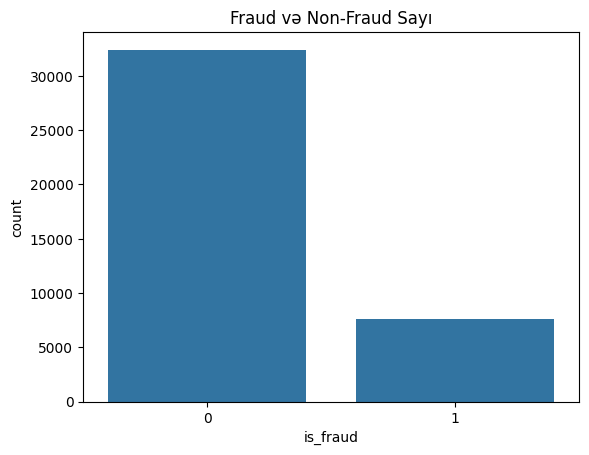

In [83]:
sns.countplot(x='is_fraud',data=df)
plt.title('Fraud və Non-Fraud Sayı')
plt.show()

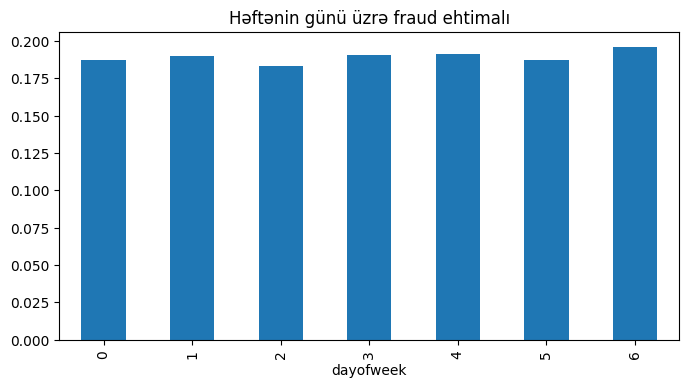

In [10]:
fraud_by_day=df.groupby('dayofweek')['is_fraud'].mean()
fraud_by_day.plot(kind='bar', title='Həftənin günü üzrə fraud ehtimalı', figsize=(8,4))
plt.show()

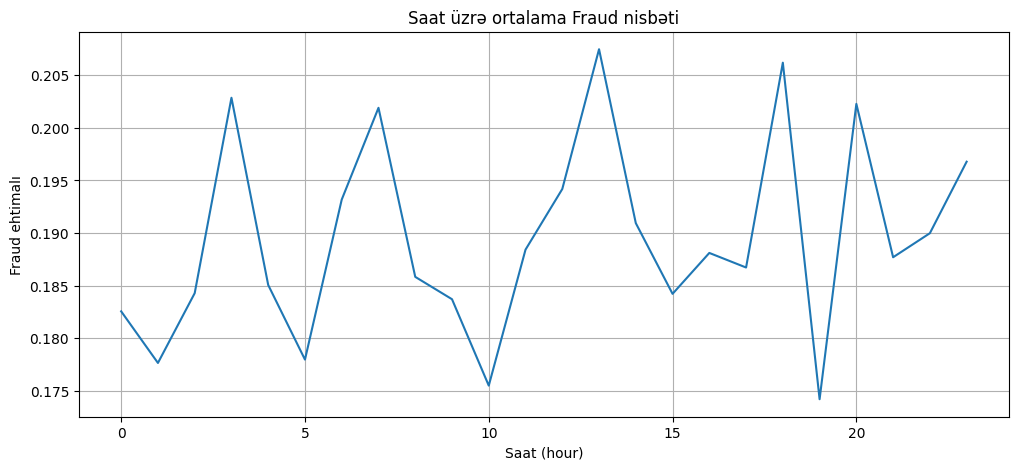

In [9]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df.groupby('hour')['is_fraud'].mean())
plt.title("Saat üzrə ortalama Fraud nisbəti")
plt.ylabel("Fraud ehtimalı")
plt.xlabel("Saat (hour)")
plt.grid(True)
plt.show()

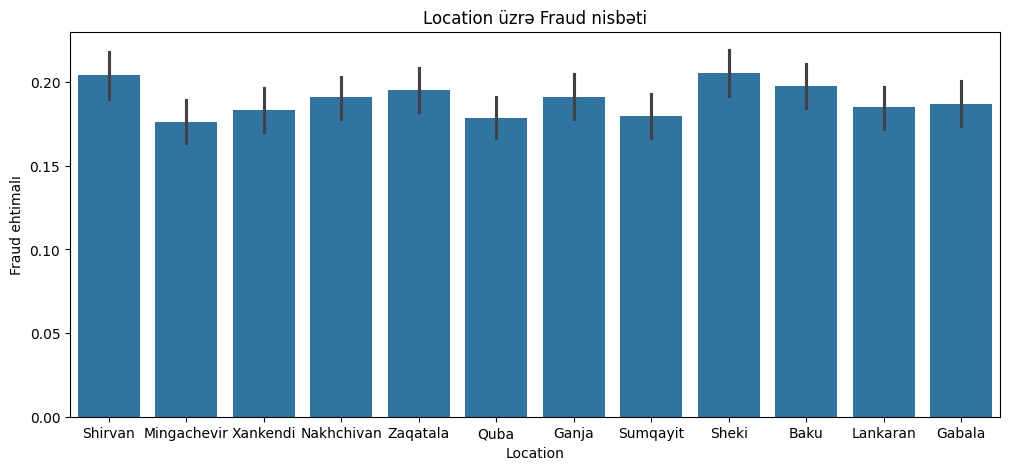

In [88]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='location', y='is_fraud')
plt.title("Location üzrə Fraud nisbəti")
plt.ylabel("Fraud ehtimalı")
plt.xlabel("Location")
plt.show()

In [89]:
df

,amount,merchant,transaction_type,transaction_category,location,gender,account_balance,is_fraud,hour,dayofweek,month
0,4222.26,Azəriqaz,online,utilities,Shirvan,Male,4108.85,1,3,1,1
1,3919.21,Spotify,mobile_app,subscriptions,Mingachevir,Female,5096.40,1,16,0,3
2,1409.91,Starbucks,atm,food,Xankendi,Female,3170.46,0,19,1,4
3,3649.43,Aptek+,mobile_app,healthcare,Xankendi,Female,3602.53,1,17,5,1
4,1581.67,Turkish Airlines,mobile_app,travel,Nakhchivan,Male,716.57,0,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...
39995,3668.18,Bolt,mobile_app,travel,Shirvan,Female,9217.95,1,20,4,1
39996,3167.19,Azercell,atm,utilities,Zaqatala,Male,9621.85,1,22,5,3
39997,3586.00,KFC,atm,food,Shirvan,Female,8684.24,1,2,2,1
39998,3360.81,Spotify,mobile_app,subscriptions,Sumqayit,Female,2942.60,0,23,5,5


# One-Hot Encode categorical columns


In [65]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [91]:
df_encoded

,amount,account_balance,is_fraud,hour,dayofweek,month,merchant_AliExpress,merchant_Amazon,merchant_Aptek+,merchant_Azercell,...,location_Lankaran,location_Mingachevir,location_Nakhchivan,location_Quba,location_Sheki,location_Shirvan,location_Sumqayit,location_Xankendi,location_Zaqatala,gender_Male
0,4222.26,4108.85,1,3,1,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,3919.21,5096.40,1,16,0,3,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1409.91,3170.46,0,19,1,4,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3649.43,3602.53,1,17,5,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,1581.67,716.57,0,6,3,4,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3668.18,9217.95,1,20,4,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
39996,3167.19,9621.85,1,22,5,3,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
39997,3586.00,8684.24,1,2,2,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
39998,3360.81,2942.60,0,23,5,5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Train-Test Split

In [66]:
df_encoded['is_fraud'].value_counts()


is_fraud
0    32420
1     7580
Name: count, dtype: int64

In [67]:
df_fraud_0 = df_encoded[df_encoded['is_fraud'] == 0]
df_fraud_1 = df_encoded[df_encoded['is_fraud'] == 1]

train_0 = df_fraud_0.sample(n=7300, random_state=42)
train_1 = df_fraud_1.sample(n=5600, random_state=24)

remaining_0 = df_fraud_0.drop(train_0.index)
remaining_1 = df_fraud_1.drop(train_1.index)

test_0 = remaining_0.sample(n=2500, random_state=89)
test_1 = remaining_1.sample(n=1427, random_state=19)

train_data = pd.concat([train_0, train_1]).sample(frac=1, random_state=7).reset_index(drop=True)
test_data = pd.concat([test_0, test_1]).sample(frac=1, random_state=8).reset_index(drop=True)

X_train = train_data.drop("is_fraud", axis=1)
y_train = train_data["is_fraud"]

X_test = test_data.drop("is_fraud", axis=1)
y_test = test_data["is_fraud"]


# Scale features

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Sadəcə ədədi dəyişənləri seçmək daha düzgündür
num_cols = ['amount', 'hour', 'dayofweek']

# Scaling tətbiq et
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])


# Train Model (Logistic Regression)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate

In [70]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Model's precision score is: {precision_score(y_test, y_pred)}")
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[1913  587]
 [ 374 1053]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2500
           1       0.64      0.74      0.69      1427

    accuracy                           0.76      3927
   macro avg       0.74      0.75      0.74      3927
weighted avg       0.77      0.76      0.76      3927

Model's precision score is: 0.6420731707317073
0.7379117028731604
0.6866644929898924
ROC AUC Score: 0.8121942536790471


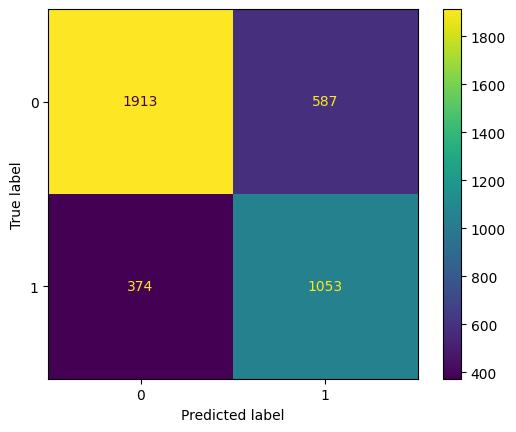

In [90]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()

# Train Model 2 ( RandomForestClassifier )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Model qurulması
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Proqnozlar
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      2500
           1       0.62      0.68      0.65      1580

    accuracy                           0.71      4080
   macro avg       0.70      0.71      0.70      4080
weighted avg       0.72      0.71      0.72      4080

ROC AUC Score: 0.7811905063291139


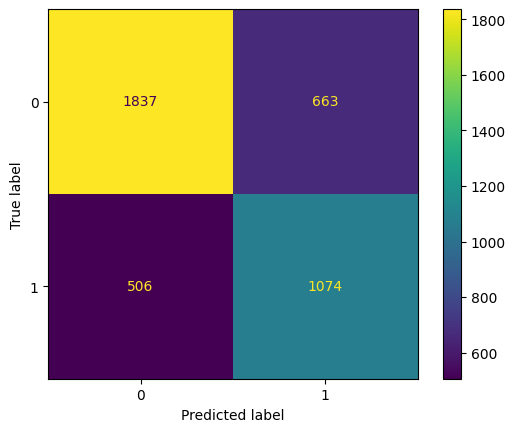

In [32]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test)

# Metriklər
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))


# Train Model 3 ( RandomForestClassifier )

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modelin yaradılması
rf_model = RandomForestClassifier(
    n_estimators=200,         # Ağac sayı (çox olanda daha sabit nəticə)
    max_depth=10,             # Ağacların maksimal dərinliyi
    class_weight='balanced',  # Fraud az olduğu üçün balans yaradır
    random_state=42
)

# Modelin öyrədilməsi
rf_model.fit(X_train, y_train)

# Proqnozlaşdırma
y_pred = rf_model.predict(X_test)

# Qiymətləndirmə
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
[[1973  527]
 [ 183 1397]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2500
           1       0.73      0.88      0.80      1580

    accuracy                           0.83      4080
   macro avg       0.82      0.84      0.82      4080
weighted avg       0.84      0.83      0.83      4080

ROC AUC Score: 0.8366886075949367
